# Programming for Data Analytics Project 2020
***



### Project brief

For this project you must create a data set by simulating a real-world phenomenon of your choosing.  You may pick any phenomenon you wish. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the `numpy.random` package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

<br>



## Introduction

I have divided this project into 4 sections, each one representing a bullet point listed in the brief above. 


<br>



## 1. Winning in football
***

For this project, I have chosen to research and investigate how a football team might increase their chances of winning. As a keen footballer myself, I would like to understand better how my own amateur team might learn from this.

For this project, I simulate the phenomenon of home team performance in the English Premier League. The simulation is modelled on data from the 2018/19 season [1]. I use a data set which consists of 380 observations (representing each individual match that took place during the season). On a personal level, the most interesting variable is the result of each match (win, loss or draw). More specifically, I am curious to investigate some of the variables which may give an good indication as to the outcome of a match. I have chosen the following 4 variables with this in mind

* Goals scored (non-zero integer)
* Possession (non-zero integer)
* Shots (non-zero integer)
* Result (categorical)

In order to accurately simulate the real world data, it is necessary to examine the properties of these variables. This includes establishing the distribution of each one as well as the relationship between each of the them. 
<br>







<br>

***

## 2. Investigation of variables
***

<br>

### 2.1 Data preparation

<br>

Firstly, I import the relevant Python packages for the simulation. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

<br>

Next, I read in the csv file which contains the necessary real world data and perform some basic operations on it to get an overview of the data.

In [2]:
# Read in csv file
df = pd.read_csv("pl_stats.csv.html")

In [3]:
# The .info method gives us an overview of the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            380 non-null    int64  
 1   date_GMT                             380 non-null    object 
 2   status                               380 non-null    object 
 3   attendance                           380 non-null    int64  
 4   home_team_name                       380 non-null    object 
 5   away_team_name                       380 non-null    object 
 6   referee                              380 non-null    object 
 7   Game Week                            380 non-null    int64  
 8   Pre-Match PPG (Home)                 380 non-null    float64
 9   Pre-Match PPG (Away)                 380 non-null    float64
 10  home_ppg                             380 non-null    float64
 11  away_ppg                        

In [4]:
# The describe() method gives a summary of the data contained in the data set
df.describe()

,timestamp,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.546145e+09,38186.847368,19.500000,1.480895,1.167632,1.615500,1.198000,1.568421,1.252632,2.821053,...,3.354763,3.219421,4.471316,5.381816,1.261000,1.821474,3.101158,5.897763,1.842316,1.908868
std,6.877351e+06,16720.334767,10.980313,0.831446,0.761209,0.590587,0.534085,1.312836,1.180031,1.601312,...,1.169849,2.962683,1.906924,5.540953,0.107498,0.312900,0.833400,2.032061,0.214528,0.228041
min,1.533928e+09,9980.000000,1.000000,0.000000,0.000000,0.470000,0.260000,0.000000,0.000000,0.000000,...,0.000000,1.070000,2.900000,1.120000,1.050000,1.200000,1.540000,2.300000,1.430000,1.380000
25%,1.540656e+09,25034.750000,10.000000,1.000000,0.630000,1.210000,0.840000,1.000000,0.000000,2.000000,...,2.922500,1.570000,3.350000,2.300000,1.180000,1.585000,2.450000,4.437500,1.690000,1.740000
50%,1.546018e+09,31948.000000,19.500000,1.470000,1.075000,1.475000,1.160000,1.000000,1.000000,3.000000,...,3.500000,2.300000,3.750000,3.350000,1.250000,1.770000,2.950000,5.500000,1.830000,1.890000
75%,1.551541e+09,53282.750000,29.000000,2.062500,1.610000,1.917500,1.542500,2.000000,2.000000,4.000000,...,4.000000,3.350000,4.850000,6.312500,1.330000,2.000000,3.600000,7.050000,1.962500,2.050000
max,1.557670e+09,81332.000000,38.000000,3.000000,3.000000,2.840000,2.320000,6.000000,6.000000,8.000000,...,8.000000,22.000000,15.750000,42.750000,1.570000,2.750000,5.650000,15.000000,2.800000,2.550000


<br>



In [5]:
# The head() method outputs the five first rows of the data set
df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


<br>

There are 64 columns in the dataframe, each representing a different variable associated with each of the 380 matches played during the season. I am interested only in 4 variables (listed above) for the purposes of this project. Directly below, I use the `list` function to output each column header. This gives me a better picture of which ones I need to retain and which ones I will discard. I found the code for this on geeksforgeeks.org [2].

In [6]:
# Create a list of every column header
list(df.columns)

['timestamp',
 'date_GMT',
 'status',
 'attendance',
 'home_team_name',
 'away_team_name',
 'referee',
 'Game Week',
 'Pre-Match PPG (Home)',
 'Pre-Match PPG (Away)',
 'home_ppg',
 'away_ppg',
 'home_team_goal_count',
 'away_team_goal_count',
 'total_goal_count',
 'total_goals_at_half_time',
 'home_team_goal_count_half_time',
 'away_team_goal_count_half_time',
 'home_team_goal_timings',
 'away_team_goal_timings',
 'home_team_corner_count',
 'away_team_corner_count',
 'home_team_yellow_cards',
 'home_team_red_cards',
 'away_team_yellow_cards',
 'away_team_red_cards',
 'home_team_first_half_cards',
 'home_team_second_half_cards',
 'away_team_first_half_cards',
 'away_team_second_half_cards',
 'home_team_shots',
 'away_team_shots',
 'home_team_shots_on_target',
 'away_team_shots_on_target',
 'home_team_shots_off_target',
 'away_team_shots_off_target',
 'home_team_fouls',
 'away_team_fouls',
 'home_team_possession',
 'away_team_possession',
 'team_a_xg',
 'team_b_xg',
 'average_goals_per_m

As detailed above, I am interested in simulating premier league results of the home team for a full season based on 4 variables: Goals scored, Possession, Shots and Result. 
<br>



### 2.2 Aggregation

<br>

First, I set about aggregating the data set so that it contains all the columns relevant to the current project. The dependent variable (result) does not have its own column in the original data set so I will need to create this. In order to do that, I include the 'away_team_goal_count' in the dataframe below:

In [7]:
# Create dataframe with relevant variables
df1 = df[["away_team_goal_count", "home_team_goal_count", "home_team_possession", "home_team_shots"]]
df1         

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots
0,1,2,46,8
1,2,1,40,11
2,0,2,62,11
3,2,0,66,11
4,3,0,37,6
...,...,...,...,...
375,0,2,59,11
376,2,0,73,21
377,1,1,53,7
378,2,2,55,9


<br>



In order to create and fill the result column, I use the code below. The `np.where()` function enables us to compare values in different columns. There is some useful information available online for this function [3], [4]. I create a new column called 'home_team_result' and assign a value to each row: W = win, L = lose, D = draw

**note: this operation raises a SettingWithCopyWarning. I have checked the documentation and many discussions and blog posts about this but have not managed to find a solution to date**


In [8]:
df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W', 
         (np.where(df1['away_team_goal_count'] == df1['home_team_goal_count'], 'D', 'L')))


<ipython-input-8-27f1615fb517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W',


In [9]:
df1

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,1,2,46,8,W
1,2,1,40,11,L
2,0,2,62,11,W
3,2,0,66,11,L
4,3,0,37,6,L
...,...,...,...,...,...
375,0,2,59,11,W
376,2,0,73,21,L
377,1,1,53,7,D
378,2,2,55,9,D


<br>



The 'away_team_goal_count' column is no longer relevant for the purposes of the project so I remove this from the data set:

In [10]:
# Delete superfluous column
del df1["away_team_goal_count"]

In [11]:
# Output dataframe with desired variables
df1

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,2,46,8,W
1,1,40,11,L
2,2,62,11,W
3,0,66,11,L
4,0,37,6,L
...,...,...,...,...
375,2,59,11,W
376,0,73,21,L
377,1,53,7,D
378,2,55,9,D


<br>

### 2.2 Variable relationships and properties

<br>

Now that I have the 4 variables I am interested in, I investigate the properties of each one and their relationships with each other. 
<br> 

In this section, I split my dataframe into 3 separate dataframes, one will contain all of the data for when the home team won, another for when they lost and other for when the result was a draw. This is executed using code I sourced on stackoverflow.com [5]. 

Analysis will be done on each of these three subsets and then compared with each other. First, I investigate variables when the result was a win.
<br>

<br>

#### 2.2.1 Win dataset

Below, I investigate the data for when the home team won. For each of the three variables (goal_count, possession and shots) I output a summary stats table and plot their distributions for visualisation. It is useful to get a picture of the distribution for simulation later on. 

<br>

In [12]:
# Split dataframe based on result (wins)
win_only = df1.loc[df1['home_team_result'] == 'W']
win_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,2,46,8,W
2,2,62,11,W
5,2,53,15,W
7,4,64,16,W
11,2,58,11,W
...,...,...,...,...
363,1,39,16,W
366,3,58,16,W
369,1,61,16,W
372,5,45,16,W


In [13]:
# Output summary of stats for win dataset
win_only.describe()

,home_team_goal_count,home_team_possession,home_team_shots
count,181.000000,181.000000,181.000000
mean,2.535912,53.867403,12.696133
std,1.132884,13.482255,4.195426
min,1.000000,23.000000,5.000000
25%,2.000000,43.000000,9.000000
50%,2.000000,55.000000,13.000000
75%,3.000000,64.000000,16.000000
max,6.000000,80.000000,26.000000


<br>



##### Win goal count

Below, I create a series containing home team goal count data only and output a summary description using `describe()`:

In [14]:
# Create series with home team goal count data only
win_goal_count = win_only['home_team_goal_count']

# Summary of goal count data
win_goal_count.describe()

count    181.000000
mean       2.535912
std        1.132884
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: home_team_goal_count, dtype: float64

<br>



Next, I plot this data on a bar chart in order to get a visualisation of the distribution. The `value_counts` function counts the unique values in a single column [6], while `sort_index` sorts these values [7]. 

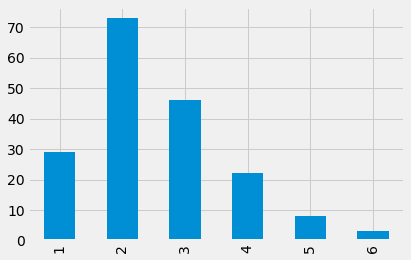

In [15]:
# Create series containing count of number of goals scored
win_goal_count_distribution = win_only['home_team_goal_count'].value_counts()

# Sort values
win_goal_count_distribution = win_goal_count_distribution.sort_index()

# Plot on a bar chart
win_goal_count_distribution.plot(kind='bar')

In [16]:
win_goal_count_distribution

1    29
2    73
3    46
4    22
5     8
6     3
Name: home_team_goal_count, dtype: int64

We now have an overall view of the distribution of number of goals the winning team scored. The bar chart is an appropriate plot to visualise the distribution as it is a series (single variable) of discrete values.

<br>



Below, I carry out a similar investigation on the possession and shots variables:

##### Win possession

In [17]:
# Create series with possession data only
win_possession = win_only["home_team_possession"]

# Summary of possession variable
win_possession.describe()

count    181.000000
mean      53.867403
std       13.482255
min       23.000000
25%       43.000000
50%       55.000000
75%       64.000000
max       80.000000
Name: home_team_possession, dtype: float64

(array([ 2., 13., 22., 18., 22., 21., 31., 22., 19., 11.]),
 array([23. , 28.7, 34.4, 40.1, 45.8, 51.5, 57.2, 62.9, 68.6, 74.3, 80. ]),
 <a list of 10 Patch objects>)

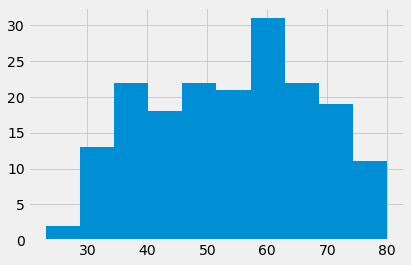

In [18]:
# Output a histogram representing the distribution for the possession variable
plt.hist(win_possession)

<br>



##### Win shots

In [19]:
# Create series with the shots variable
win_shots = win_only['home_team_shots']

# Summary of shots variable
win_shots.describe()

count    181.000000
mean      12.696133
std        4.195426
min        5.000000
25%        9.000000
50%       13.000000
75%       16.000000
max       26.000000
Name: home_team_shots, dtype: float64

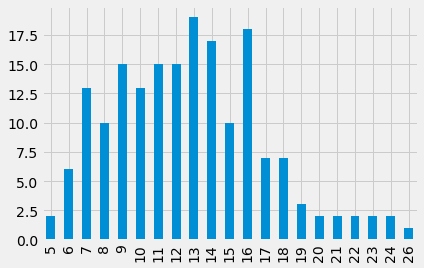

In [20]:
# Use the value_counts function to count each unique value in the shots columns
win_shots_distribution = win_only['home_team_shots'].value_counts()

# Sort the values for visualisation
win_shots_distribution = win_shots_distribution.sort_index()

# Plot on a bar chart
win_shots_distribution.plot(kind='bar')

<br>



#### 2.2.2 Lose dataset

<br>

In this section, I investigate the properties of the variables for when the home team lost. This process will follow in precisely the same path as the previous section to maintain consistency for the simulated data set below.

In [21]:
# Split dataframe based on result (losses)
lose_only = df1.loc[df1['home_team_result'] == 'L']
lose_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
1,1,40,11,L
3,0,66,11,L
4,0,37,6,L
9,0,42,8,L
14,1,61,9,L
...,...,...,...,...
370,1,23,6,L
371,1,39,12,L
373,0,68,11,L
376,0,73,21,L


<br>



In [22]:
# Output summary of the lose dataset
lose_only.describe()

,home_team_goal_count,home_team_possession,home_team_shots
count,128.000000,128.000000,128.000000
mean,0.539062,46.445312,9.562500
std,0.600555,13.953697,3.658127
min,0.000000,18.000000,0.000000
25%,0.000000,35.750000,7.000000
50%,0.000000,47.000000,9.000000
75%,1.000000,57.250000,12.000000
max,2.000000,78.000000,21.000000


<br>



##### Lose goal count

In [23]:
# Create series with home team goal count data only
lose_goal_count = lose_only['home_team_goal_count']

# Summary of goal count data
lose_goal_count.describe()

count    128.000000
mean       0.539062
std        0.600555
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: home_team_goal_count, dtype: float64

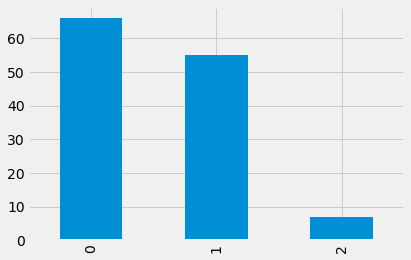

In [24]:
# Create series containing count of number of goals scored
lose_goal_count_distribution = lose_only['home_team_goal_count'].value_counts()

# Sort values
lose_goal_count_distribution = lose_goal_count_distribution.sort_index()

# Plot on a bar chart
lose_goal_count_distribution.plot(kind='bar')

In [25]:
lose_goal_count_distribution

0    66
1    55
2     7
Name: home_team_goal_count, dtype: int64

In [26]:
# Divide the frequency of each goal scored by total number of matches lost and add to list
lose_goal_count_prob = list(lose_goal_count_distribution / 128)

# Output list of probabilities
lose_goal_count_prob

[0.515625, 0.4296875, 0.0546875]

<br>



##### Lose possession

In [27]:
# Create series with possession data only
lose_possession = lose_only["home_team_possession"]

# Summary of possession data
lose_possession.describe()

count    128.000000
mean      46.445312
std       13.953697
min       18.000000
25%       35.750000
50%       47.000000
75%       57.250000
max       78.000000
Name: home_team_possession, dtype: float64

Below, I plot the possession variable on a histogram. There is a much more obvious symmetry to this distribution than the *win_possession* variale. It could be posited that this follows a normal distribution, just from taking a quick look at the plot. This differs from the distribution for the same variable in the win dataset above, where the distribution was less symmetrical.

(array([ 6., 10., 16., 18., 16., 20., 16., 13.,  8.,  5.]),
 array([18., 24., 30., 36., 42., 48., 54., 60., 66., 72., 78.]),
 <a list of 10 Patch objects>)

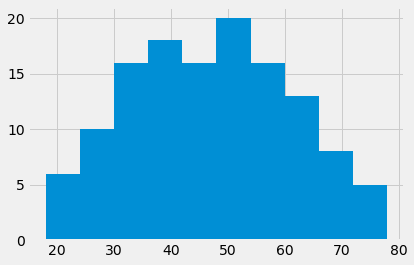

In [28]:
# Plot lose possession variable on a histogram
plt.hist(lose_possession)

<br>



##### Lose shots

In [29]:
# Create series with the shots variable
lose_shots = lose_only['home_team_shots']

# Summary of shots variable
lose_shots.describe()

count    128.000000
mean       9.562500
std        3.658127
min        0.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: home_team_shots, dtype: float64

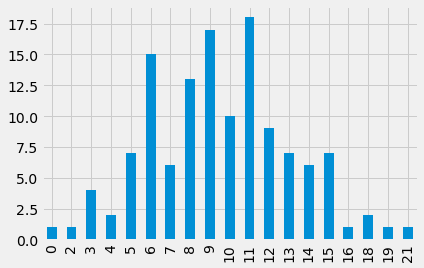

In [30]:
# Use the value_counts function to count each unique value in the shots columns
lose_shots_distribution = lose_only['home_team_shots'].value_counts()

# Sort the values for visualisation
lose_shots_distribution = lose_shots_distribution.sort_index()

# Plot on a bar chart
lose_shots_distribution.plot(kind='bar')

<br>



#### 2.2.3 Draw dataset

<br>

The draw dataset will contain variable values pertaining to the drawn matches. As above with the win and lose datasets, I will investigate the properties of each variable and visualise their distributions.

<br>



In [31]:
# Split dataframe based on result (draws)
draw_only = df1.loc[df1['home_team_result'] == 'D']
draw_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
6,2,57,10,D
8,0,47,10,D
10,0,51,8,D
20,1,28,9,D
21,2,49,16,D
...,...,...,...,...
367,1,35,6,D
368,1,70,14,D
374,0,46,8,D
377,1,53,7,D


In [32]:
draw_only.describe()

,home_team_goal_count,home_team_possession,home_team_shots
count,71.000000,71.000000,71.000000
mean,0.957746,52.690141,11.042254
std,0.800654,12.418410,4.350490
min,0.000000,26.000000,0.000000
25%,0.000000,44.000000,8.000000
50%,1.000000,54.000000,10.000000
75%,1.000000,61.000000,13.500000
max,3.000000,76.000000,21.000000


<br>



##### Draw goal count



In [33]:
# Create series with home team goal count data only
draw_goal_count = draw_only['home_team_goal_count']

# Summary of goal count data
draw_goal_count.describe()

count    71.000000
mean      0.957746
std       0.800654
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: home_team_goal_count, dtype: float64

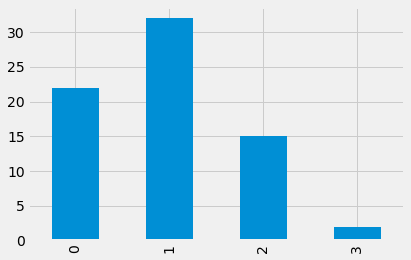

In [34]:
# Create series containing count of number of goals scored
draw_goal_count_distribution = draw_only['home_team_goal_count'].value_counts()

# Sort values
draw_goal_count_distribution = draw_goal_count_distribution.sort_index()

# Plot on a bar chart
draw_goal_count_distribution.plot(kind='bar')

In [35]:
draw_goal_count_distribution

0    22
1    32
2    15
3     2
Name: home_team_goal_count, dtype: int64

In [36]:
# Divide the frequency of each goal scored by total number of matches drawn and add to list
draw_goal_count_prob = list(draw_goal_count_distribution / 71)

# Output list of probabilities
draw_goal_count_prob

[0.30985915492957744,
 0.4507042253521127,
 0.2112676056338028,
 0.028169014084507043]

<br>



##### Draw possession

In [37]:
# Create series with possession data only
draw_possession = draw_only["home_team_possession"]

# Summary of possession data
draw_possession.describe()

count    71.000000
mean     52.690141
std      12.418410
min      26.000000
25%      44.000000
50%      54.000000
75%      61.000000
max      76.000000
Name: home_team_possession, dtype: float64

(array([ 4.,  4.,  3.,  9.,  9., 11., 12.,  9.,  3.,  7.]),
 array([26., 31., 36., 41., 46., 51., 56., 61., 66., 71., 76.]),
 <a list of 10 Patch objects>)

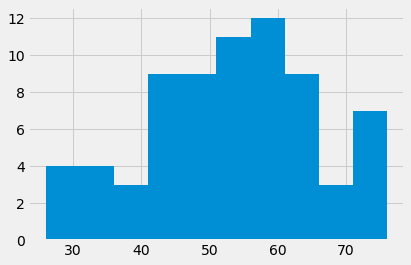

In [38]:
plt.hist(draw_possession)

<br>



###### Draw shots

<br>

In [39]:
# Create series with the shots variable
draw_shots = draw_only['home_team_shots']

# Summary of shots variable
draw_shots.describe()

count    71.000000
mean     11.042254
std       4.350490
min       0.000000
25%       8.000000
50%      10.000000
75%      13.500000
max      21.000000
Name: home_team_shots, dtype: float64

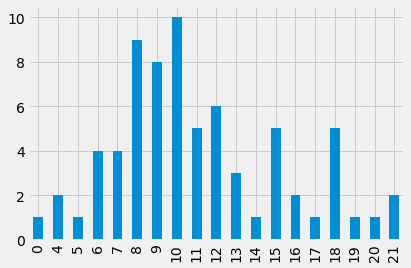

In [40]:
# Use the value_counts function to count each unique value in the shots columns
draw_shots_distribution = draw_only['home_team_shots'].value_counts()

# Sort the values for visualisation
draw_shots_distribution = draw_shots_distribution.sort_index()

# Plot on a bar chart
draw_shots_distribution.plot(kind='bar')

<br>



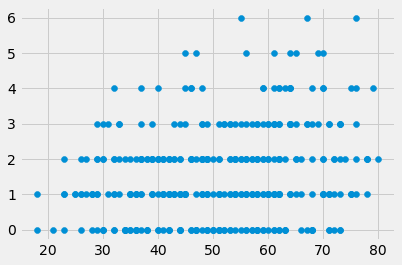

In [41]:
plt.scatter(df1["home_team_possession"], df1["home_team_goal_count"])

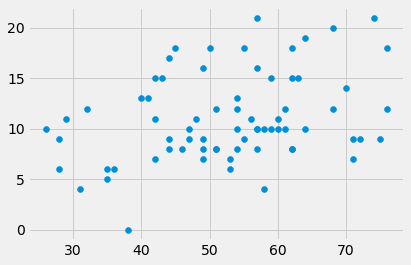

In [42]:
plt.scatter(draw_possession, draw_shots)

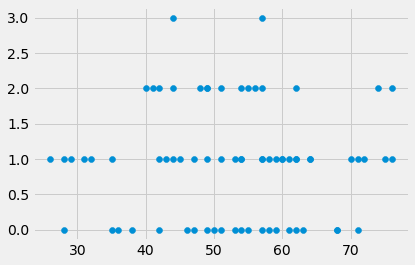

In [43]:
plt.scatter(draw_possession, draw_goal_count)

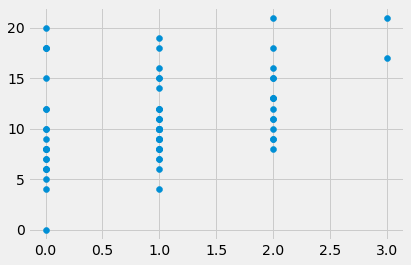

In [44]:
plt.scatter(draw_goal_count, draw_shots)

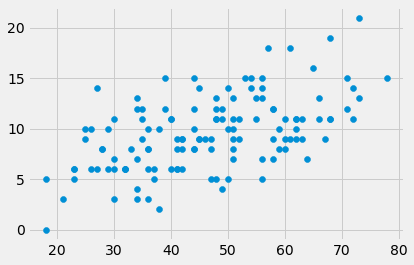

In [45]:
plt.scatter(lose_possession, lose_shots)

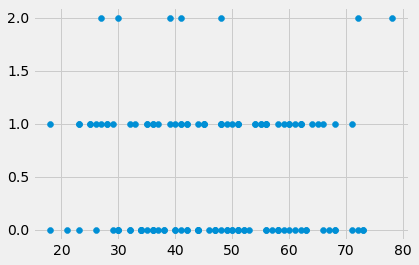

In [46]:
plt.scatter(lose_possession, lose_goal_count)

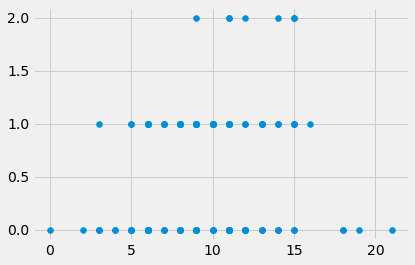

In [47]:
plt.scatter(lose_shots, lose_goal_count)

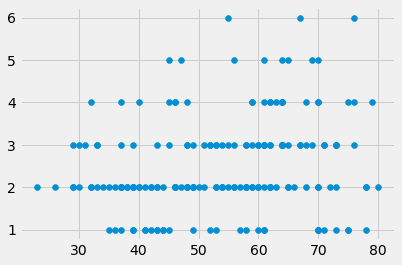

In [48]:
plt.scatter(win_possession, win_goal_count)

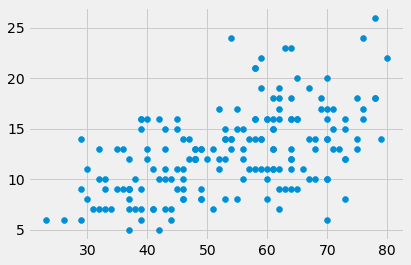

In [49]:
plt.scatter(win_possession, win_shots)

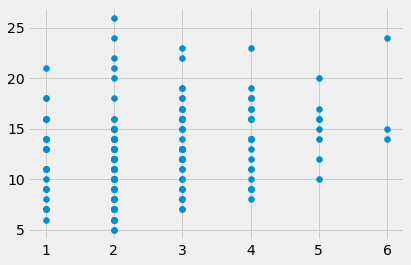

In [50]:
plt.scatter(win_goal_count, win_shots)

##### 2.2.4 Comparing variables

In order to generate as accurate a simulation as possible, 

Plotting the **goal count** for win, lose and draw on the same plot, we get a better overall view of the comparison between them. <br>

First, I create a dataframe containing each of the three series (win_goal_count_distribution, lose_goal_count_distribution and draw_goal_count_distribution). This enables the generation of side-by-side visualisation of the bar plots. I used a combination of these two blog plosts to generate this plot [9], [10]:

Text(0, 0.5, 'No. of Matches')

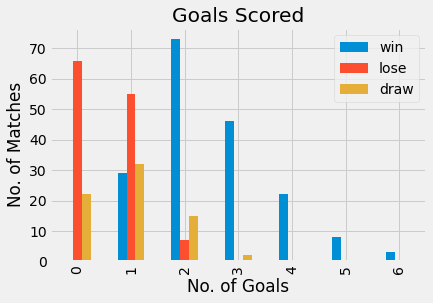

In [51]:
# Create a dictionary so we can combine the meta data for the series
goals_dict = { 'win': win_goal_count_distribution, 'lose': lose_goal_count_distribution, 'draw': draw_goal_count_distribution } 

# Create a dataframe and store it in 
goals_comparison = pd.DataFrame(goals_dict) 
goals_comparison.plot(kind="bar")

plt.title("Goals Scored")
plt.xlabel("No. of Goals")
plt.ylabel("No. of Matches")

This gives us a visualisation of the comparison between the goals scored depending on the result. Scoring 4 and above was guaranteed to result in a win, while 2 and 3 goals scored resulted in a high probability of victory. Unsurprisingly, scoring 0 goals increased a team's chances of losing significantly.

<br>



Text(0, 0.5, 'No. of Matches')

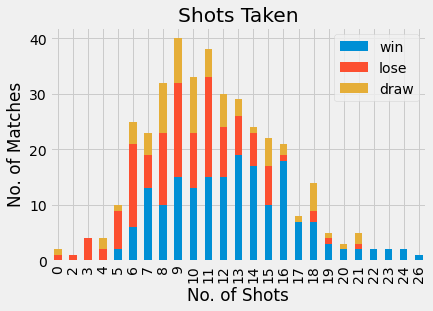

In [52]:
# Create a dictionary so we can combine the meta data for the series
shots_dict = { 'win': win_shots_distribution, 'lose': lose_shots_distribution, 'draw': draw_shots_distribution } 

# Create a dataframe and store it in 
goals_comparison = pd.DataFrame(shots_dict) 
goals_comparison.plot(kind="bar", stacked=True)

plt.title("Shots Taken")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

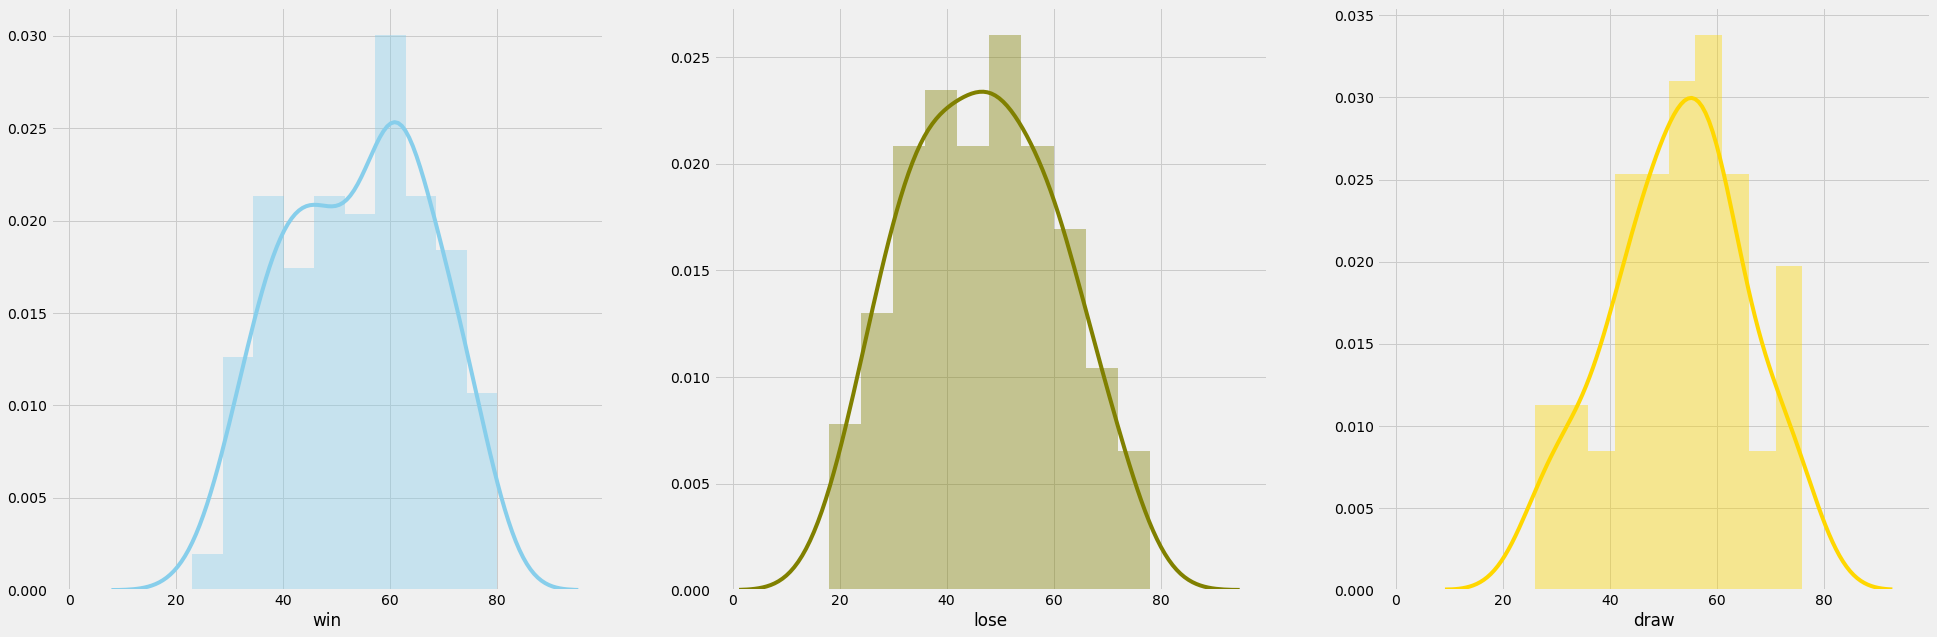

In [53]:
# Create a dictionary so we can combine the meta data for the series
possession_dict = { 'win': win_possession, 'lose': lose_possession, 'draw': draw_possession } 

# Create a dataframe and store it in 
possession_comparison = pd.DataFrame(possession_dict) 
# possession_comparison.plot(kind="bar", stacked=True)

# plot
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=True)
sns.distplot( possession_comparison["win"] , bins=10, color="skyblue", ax=axes[0])
sns.distplot( possession_comparison["lose"] , bins=10, color="olive", ax=axes[1])
sns.distplot( possession_comparison["draw"] , bins=10, color="gold", ax=axes[2])

<br>



## 3. Simulation

***

In this section, I apply the variable properties established in section 2 to a simulated data set. Using the `numpy.random` package, I generate values for each variable according to the information extracted above. In order to populate the synthesised data set, it is once again necessary to divide the task into the 3 relevant sections - for win, lose and draw. 

<br>



First of all, I construct a new Generator as recommended by the `numpy.random` documentation [8]. 

In [54]:
# Construct new Generator
rng = np.random.default_rng()

<br>



The simulated data set will be populated according to the values corresponding to each categorical variable i.e win, lose and draw. It is this column therefore which will be the first added to the new dataframe:

<br>



I create a list containing each variable

In [55]:
# Create a list containing each categorical variable
sim_result = ['W', 'L', 'D']

Next, I calculate the proportion of each one as they appear in the real world data set:

In [56]:
# Calculate the proportion of each result in the real world data set
W, L, D = 181/380, 128/380, 71/380

In [57]:
# Output values to the screen
print(W, L, D)

0.4763157894736842 0.3368421052631579 0.1868421052631579


These values will be passed to the probability parameter of the `random.choice` function in order to distribute them according to the real world data set:

In [58]:
# Each of the categorical variables chosen at random and distributed according to the probability values 
# calculated above
sim_results = rng.choice(sim_result, 200, p=[0.48, 0.34, 0.18])

<br>



Next, I create a new dataframe containing the simulated results column generated above:

In [59]:
# Create new simulated dataframe with result column
sim_df = pd.DataFrame(sim_results, columns = ['result']) 

# Output the new dataframe
sim_df.head(10)

,result
0,W
1,W
2,L
3,L
4,W
5,D
6,W
7,W
8,W
9,D


<br>



The next step is to populate the new dataframe with the simulated data. This will be done category by category and column by column. The first category will be 'W' (win).



<br>



### 3.1 Win

For each of the three independent variables, I will generate data using `numpy.random`. For the two ordinal variables (goal_count and shots) I will apply the `random.choice` method, having calculated the probability distribution of each variable. For the possession variable, I will generate the simulated data using the distribution functions. 
<br>



<br>


##### 3.1.1 Goal count

First, I calculate the frequency of each number of goals scored by the winning team. These values represent the probability distribution of the the goal_count variable.

In [60]:
# Divide the frequency of each goal scored by total number of matches won and add to list
win_goal_count_prob = list(win_goal_count_distribution / 181)

# Output list of probabilities
win_goal_count_prob

[0.16022099447513813,
 0.40331491712707185,
 0.2541436464088398,
 0.12154696132596685,
 0.04419889502762431,
 0.016574585635359115]

The `random.choice` method is very effective in closely simulating data according to the probability distribution of an ordinal variable such as goal_count. The 'p' parameter allows us to weight each value for goal_count and so accurately mirrors the real world data set. The sum of the probabilities must add to 1. At times, this can raise errors when dealing with floating point values. We will explore this later below.

In [61]:
# Sum of probabilities to check if they add to exactly 1
sum(win_goal_count_prob)

1.0

Next, I generate a list containing each unique value in win_goal_count. I found useful code for executing this at w3resource.com [12]:

In [62]:
# Get unique values from win_goal_count and store them in a set
win_goal_count_set = set(win_goal_count)

# Convert the set to a list 
win_goal_count_list = list(win_goal_count_set)

# Output the list
print(win_goal_count_list)

[1, 2, 3, 4, 5, 6]


We now have a list of unique goal count values and their corresponding probabilities. Using `random.choice`, I generate an array containing the goal count for each win:

In [63]:
# Generate array of random values using probabilities calculated above
win_goal_count_sim = rng.choice(win_goal_count_list, 200, p=win_goal_count_prob)

<br>



To check the accuracy of the simulation, I plot the real world data set against the simulated data set for the goal count. First, I prepare the data:

In [64]:
# Convert array to pandas series
win_goal_count_sim = pd.Series(win_goal_count_sim)

# Count the frequency of each value in the series
win_goal_count_sim_distribution = win_goal_count_sim.value_counts()

# Sort the values
win_goal_count_sim_distribution = win_goal_count_sim_distribution.sort_index()

Text(0, 0.5, 'No. of Matches')

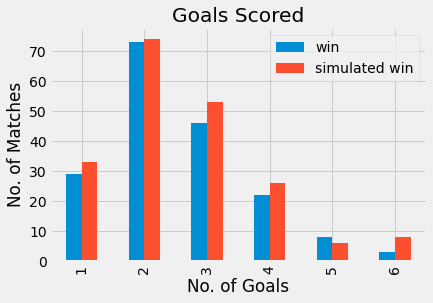

In [65]:
# Create a dictionary so we can combine the meta data for the series
sim_goals_dict = { 'win': win_goal_count_distribution, 'simulated win': win_goal_count_sim_distribution }

# Create a dataframe and store it in 
sim_goals_comparison = pd.DataFrame(sim_goals_dict) 
sim_goals_comparison.plot(kind="bar")

plt.title("Goals Scored")
plt.xlabel("No. of Goals")
plt.ylabel("No. of Matches")

Through visualisation, this bar chart demonstrates the accuracy of the simulated data.

<br>



##### 3.1.2 Shots

<br>

I will take a similar approach to generating the simulated data for the shots variable. As mentioned above, when using `random.choice`, the probability values (*p*) must add to 1. When I sum the probability values together below, we see the total is just under 1. The `random.choice` will not work unless this value is exactly 1. I found an informative discussion on stackoverflow.com dealing with this very issue [13]. I have implemented the solution below. 

In [66]:
# Divide the frequency of each number of shots taken by total number of matches won and add to list
win_shots_prob = list(win_shots_distribution / 181)


sum(win_shots_prob)

0.9999999999999998

In [67]:
# Convert to array
win_shots_prob = np.array(win_shots_prob)

# Divide by the sum of its elements. This normalizes the probabilities.
win_shots_prob /= win_shots_prob.sum()

# Output sum of probabilities
win_shots_prob.sum()

1.0

<br>

As above, I create a list of the unique values for win_shots:

In [68]:
# Get unique values from win_shots and store them in a set
win_shots_set = set(win_shots)

# Convert the set to a list 
win_shots_list = list(win_shots_set)

# Output the list
print(win_shots_list)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26]


<br>

Now we are ready to generate our simulated values for the win_shots variable:

In [69]:
# Generate array of simulated data for shots variable
win_shots_sim = rng.choice(win_shots_list, 200, p=win_shots_prob)

In [70]:
# Convert array to pandas series
win_shots_sim = pd.Series(win_shots_sim)

# Count the frequency of each value in the series
win_shots_sim_distribution = win_shots_sim.value_counts()

# Sort the values
win_shots_sim_distribution = win_shots_sim_distribution.sort_index()

Text(0, 0.5, 'No. of Matches')

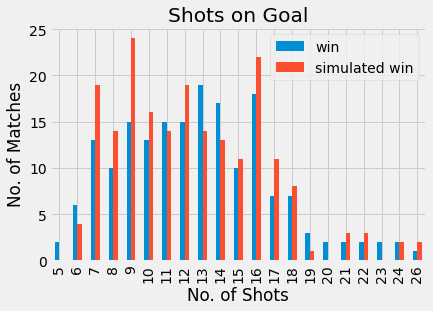

In [71]:
# Create a dictionary so we can combine the meta data for the series
sim_shots_dict = { 'win': win_shots_distribution, 'simulated win': win_shots_sim_distribution }

# Create a dataframe and store it in 
sim_shots_comparison = pd.DataFrame(sim_shots_dict) 
sim_shots_comparison.plot(kind="bar")

plt.title("Shots on Goal")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

Once again, we see how closely the simulated data set resembles the real world data set.

<br>



##### 3.1.3 Possession

<br>

To simulate the data for the possession variable, I will use the `random.normal` function to generate an array of values normally distributed. Using `pandas` `describe` function once again, we can see the mean $\mu$ and standard deviation $\sigma$ and apply these values to our simulated data. The `random.normal` function takes these two values as parameters in order to generate random data in the normal distribution.

In [72]:
win_possession.describe()

count    181.000000
mean      53.867403
std       13.482255
min       23.000000
25%       43.000000
50%       55.000000
75%       64.000000
max       80.000000
Name: home_team_possession, dtype: float64

In [73]:
# Assign values for mu and sigma based on real world data set
mu, sigma = 53.867403, 13.482255

# generate random values for simulated possession variable
sim_possession_norm = np.random.default_rng().normal(mu, sigma, 200)

<br>



Let's plot this on a graph and compare with the real world data set. <br>

First, I will convert *sim_possesion_norm* to a pandas series

In [74]:
# Convert array to pandas series
sim_possession_norm = pd.Series(sim_possession_norm)

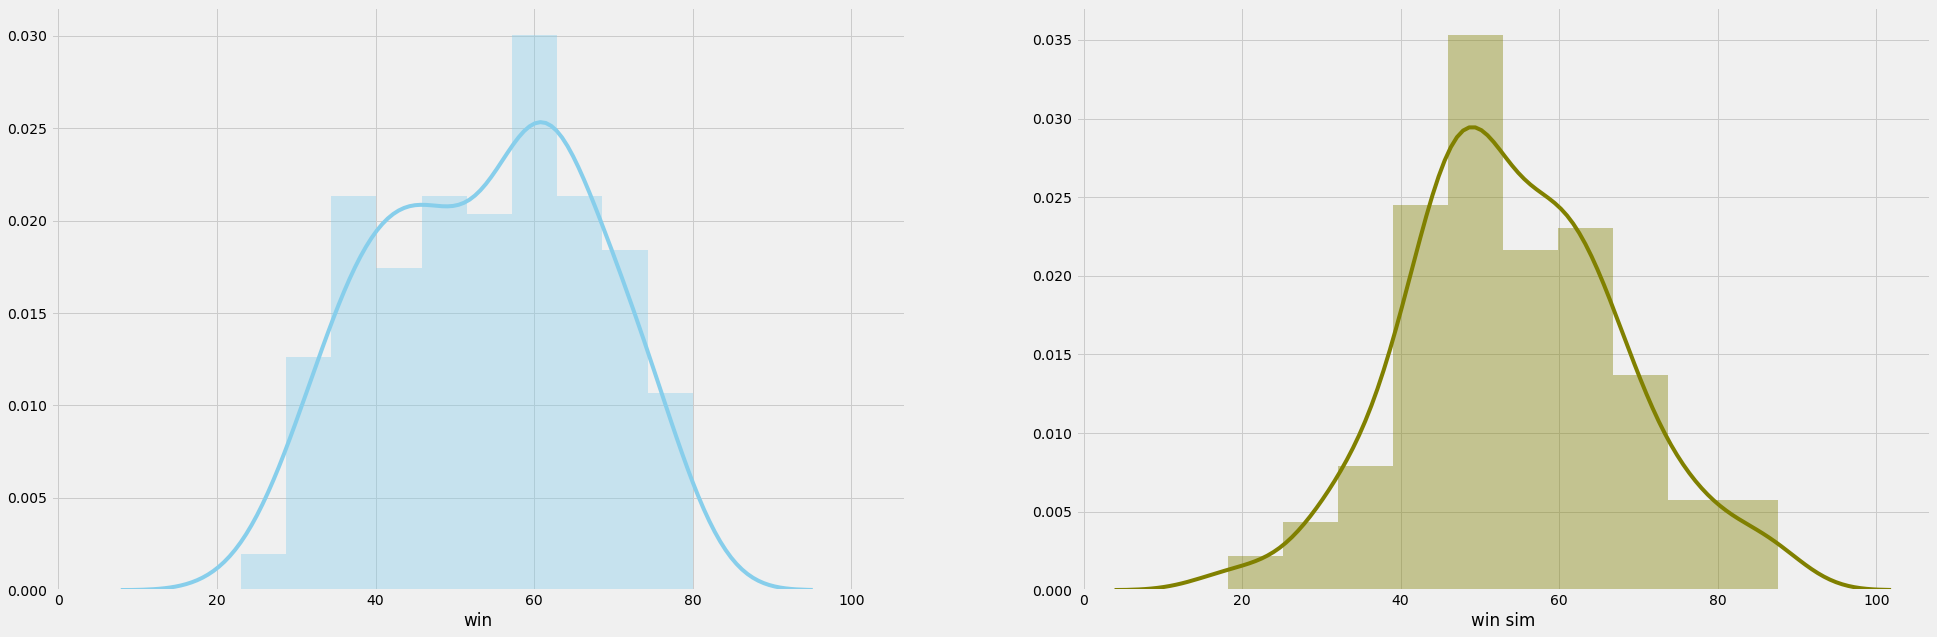

In [75]:
# Create a dictionary so we can combine the meta data for the series
sim_possession_dict = { 'win': win_possession, 'win sim': sim_possession_norm } 

# Create a dataframe and store it in 
sim_possession_comparison = pd.DataFrame(sim_possession_dict) 

# plot
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
sns.distplot( sim_possession_comparison["win"] , bins=10, color="skyblue", ax=axes[0])
sns.distplot( sim_possession_comparison["win sim"] , bins=10, color="olive", ax=axes[1])

Viewed side by side, we can see there is a notable difference in the shape of both distributions. The simulated data clearly has a more pronounced bell-shaped curve. 

<br>



We now have our simulated values for all our variables for the *win* subset. Let's populate our simulated data set with these values. Using a for loop, I populate each variable column for when *result = 'W'*. My idea for this code came from a blog post found on towardsdatascience.com [14].

In [76]:
sim_df["goals scored"] = 0
sim_df["possession"] = 0
sim_df["shots"] = 0

for i in range(len(sim_df)):
    if sim_df["result"][i]=="W":
        sim_df["goals scored"][i]=rng.choice(win_goal_count_sim, 1)
        sim_df["possession"][i]=rng.choice(sim_possession_norm, 1)
        sim_df["shots"][i]=rng.choice(win_shots_sim, 1)
        

<ipython-input-76-58a503a07a5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["goals scored"][i]=rng.choice(win_goal_count_sim, 1)
<ipython-input-76-58a503a07a5e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["possession"][i]=rng.choice(sim_possession_norm, 1)
<ipython-input-76-58a503a07a5e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["shots"][i]=rng.choice(win_shots_sim, 1)


In [77]:
sim_df.head(20)

,result,goals scored,possession,shots
0,W,2,43,14
1,W,4,48,9
2,L,0,0,0
3,L,0,0,0
4,W,3,68,16
5,D,0,0,0
6,W,2,47,8
7,W,4,51,16
8,W,3,49,13
9,D,0,0,0


Taking a quick look at the first twenty values of the simulated data set, they appear to match the real world data quite accurately.

<br>



To populate the rest of the data set I will now perform the execute the same code for the *draw* and *lose* categorical variables:

### 3.2 Lose

<br>

For each variable in the lose subset, the procedure is precisely the same as for the win subset: 

##### 3.2.1 Goal count

In [78]:
# Divide the frequency of each goal scored by total number of matches won and add to list
lose_goal_count_prob = list(lose_goal_count_distribution / 128)

# Output list of probabilities
lose_goal_count_prob

[0.515625, 0.4296875, 0.0546875]

In [79]:
sum(lose_goal_count_prob)

1.0

In [80]:
# Get unique values from lose_goal_count and store them in a set
lose_goal_count_set = set(lose_goal_count)

# Convert the set to a list 
lose_goal_count_list = list(lose_goal_count_set)

# Output the list
print(lose_goal_count_list)

[0, 1, 2]


In [81]:
# Generate array of random values using probabilities calculated above
lose_goal_count_sim = rng.choice(lose_goal_count_list, 200, p=lose_goal_count_prob)

In [82]:
# Convert array to pandas series
lose_goal_count_sim = pd.Series(lose_goal_count_sim)

# Count the frequency of each value in the series
lose_goal_count_sim_distribution = lose_goal_count_sim.value_counts()

# Sort the values
lose_goal_count_sim_distribution = lose_goal_count_sim_distribution.sort_index()

Text(0, 0.5, 'No. of Matches')

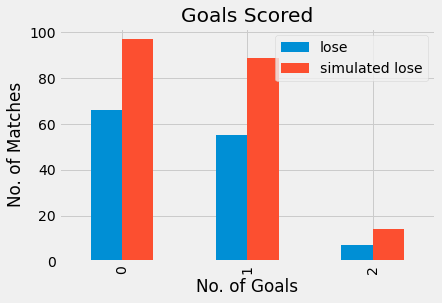

In [83]:
# Create a dictionary so we can combine the meta data for the series
lose_sim_goals_dict = { 'lose': lose_goal_count_distribution, 'simulated lose': lose_goal_count_sim_distribution }

# Create a dataframe and store it in 
lose_sim_goals_comparison = pd.DataFrame(lose_sim_goals_dict) 
lose_sim_goals_comparison.plot(kind="bar")

plt.title("Goals Scored")
plt.xlabel("No. of Goals")
plt.ylabel("No. of Matches")

<br>



##### 3.2.2 Shots

In [84]:
# Divide the frequency of each number of shots taken by total number of matches won and add to list
lose_shots_prob = list(lose_shots_distribution / 128)


sum(lose_shots_prob)

1.0

In [85]:
# Get unique values from win_shots and store them in a set
lose_shots_set = set(lose_shots)

# Convert the set to a list 
lose_shots_list = list(lose_shots_set)

# Output the list
print(lose_shots_list)

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21]


In [86]:
# Generate array of simulated data for shots variable
lose_shots_sim = rng.choice(lose_shots_list, 200, p=lose_shots_prob)

In [87]:
# Convert array to pandas series
lose_shots_sim = pd.Series(lose_shots_sim)

# Count the frequency of each value in the series
lose_shots_sim_distribution = lose_shots_sim.value_counts()

# Sort the values
lose_shots_sim_distribution = lose_shots_sim_distribution.sort_index()

Text(0, 0.5, 'No. of Matches')

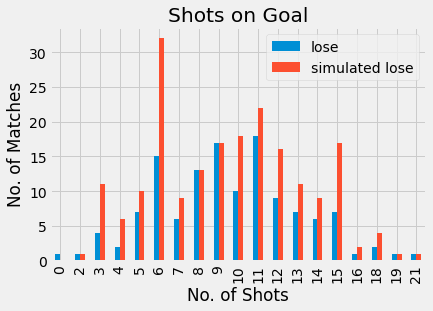

In [88]:
# Create a dictionary so we can combine the meta data for the series
lose_sim_shots_dict = { 'lose': lose_shots_distribution, 'simulated lose': lose_shots_sim_distribution }

# Create a dataframe and store it in 
lose_sim_shots_comparison = pd.DataFrame(lose_sim_shots_dict) 
lose_sim_shots_comparison.plot(kind="bar")

plt.title("Shots on Goal")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

<br>



##### 3.2.3 Possession

<br>

In [89]:
lose_possession.describe()

count    128.000000
mean      46.445312
std       13.953697
min       18.000000
25%       35.750000
50%       47.000000
75%       57.250000
max       78.000000
Name: home_team_possession, dtype: float64

In [90]:
# Assign values for mu and sigma based on real world data set
mu, sigma = 46.445312, 13.953697

# generate random values for simulated possession variable
lose_sim_possession_norm = np.random.default_rng().normal(mu, sigma, 200)

In [91]:
# Convert array to pandas series
lose_sim_possession_norm = pd.Series(lose_sim_possession_norm)

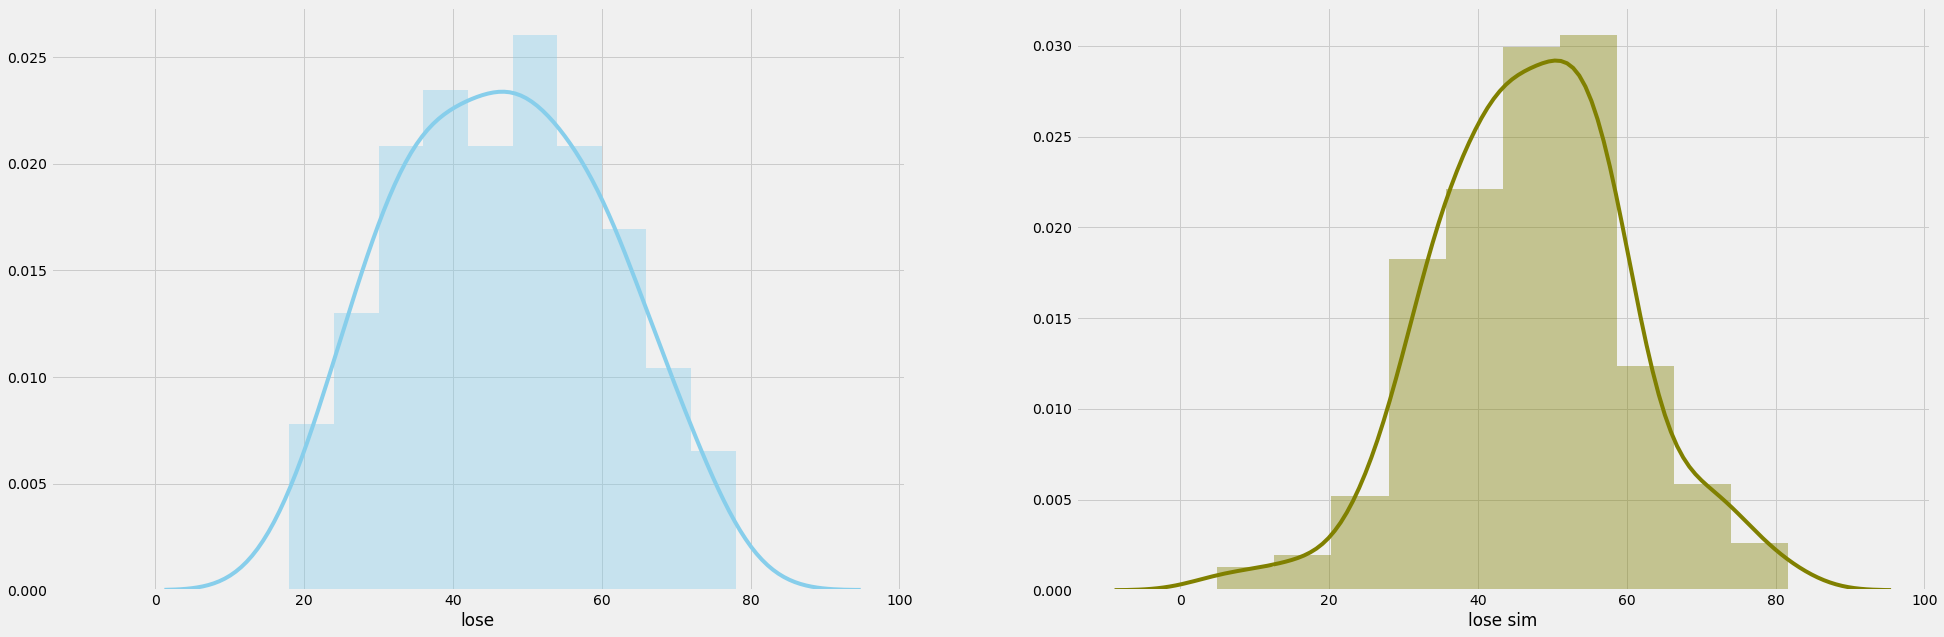

In [92]:
# Create a dictionary so we can combine the meta data for the series
lose_sim_possession_dict = { 'lose': lose_possession, 'lose sim': lose_sim_possession_norm } 

# Create a dataframe and store it in 
lose_sim_possession_comparison = pd.DataFrame(lose_sim_possession_dict) 

# plot
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
sns.distplot( lose_sim_possession_comparison["lose"] , bins=10, color="skyblue", ax=axes[0])
sns.distplot( lose_sim_possession_comparison["lose sim"] , bins=10, color="olive", ax=axes[1])

<br>



In [93]:
# sim_df["goals scored"] = 0
# sim_df["possession"] = 0
# sim_df["shots"] = 0

for i in range(len(sim_df)):
    if sim_df["result"][i]=="L":
        sim_df["goals scored"][i]=rng.choice(lose_goal_count_sim, 1)
        sim_df["possession"][i]=rng.choice(lose_sim_possession_norm, 1)
        sim_df["shots"][i]=rng.choice(lose_shots_sim, 1)

<ipython-input-93-77b7288a69f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["goals scored"][i]=rng.choice(lose_goal_count_sim, 1)
<ipython-input-93-77b7288a69f1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["possession"][i]=rng.choice(lose_sim_possession_norm, 1)
<ipython-input-93-77b7288a69f1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["shots"][i]=rng.choice(lose_shots_sim, 1)


In [94]:
sim_df.head(20)

,result,goals scored,possession,shots
0,W,2,43,14
1,W,4,48,9
2,L,1,65,6
3,L,1,43,15
4,W,3,68,16
5,D,0,0,0
6,W,2,47,8
7,W,4,51,16
8,W,3,49,13
9,D,0,0,0


<br>



### 3.3 Draw

<br>

##### 3.3.1 Goal count

In [95]:
# Divide the frequency of each goal scored by total number of matches won and add to list
draw_goal_count_prob = list(draw_goal_count_distribution / 71)

# Output list of probabilities
draw_goal_count_prob

[0.30985915492957744,
 0.4507042253521127,
 0.2112676056338028,
 0.028169014084507043]

In [96]:
sum(draw_goal_count_prob)

1.0

In [97]:
# Get unique values from lose_goal_count and store them in a set
draw_goal_count_set = set(draw_goal_count)

# Convert the set to a list 
draw_goal_count_list = list(draw_goal_count_set)

# Output the list
print(draw_goal_count_list)

[0, 1, 2, 3]


In [98]:
# Generate array of random values using probabilities calculated above
draw_goal_count_sim = rng.choice(draw_goal_count_list, 200, p=draw_goal_count_prob)

In [99]:
# Convert array to pandas series
draw_goal_count_sim = pd.Series(draw_goal_count_sim)

# Count the frequency of each value in the series
draw_goal_count_sim_distribution = draw_goal_count_sim.value_counts()

# Sort the values
draw_goal_count_sim_distribution = draw_goal_count_sim_distribution.sort_index()

Text(0, 0.5, 'No. of Matches')

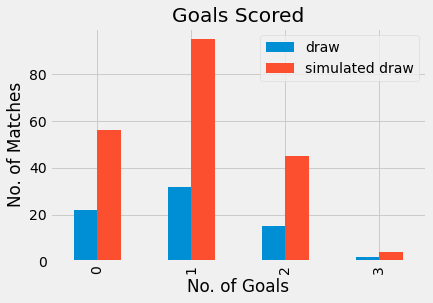

In [100]:
# Create a dictionary so we can combine the meta data for the series
draw_sim_goals_dict = { 'draw': draw_goal_count_distribution, 'simulated draw': draw_goal_count_sim_distribution }

# Create a dataframe and store it in 
draw_sim_goals_comparison = pd.DataFrame(draw_sim_goals_dict) 
draw_sim_goals_comparison.plot(kind="bar")

plt.title("Goals Scored")
plt.xlabel("No. of Goals")
plt.ylabel("No. of Matches")

<br>



##### 3.3.2 Shots

In [101]:
# Divide the frequency of each number of shots taken by total number of matches won and add to list
draw_shots_prob = list(draw_shots_distribution / 71)


sum(draw_shots_prob)

1.0

In [102]:
# Get unique values from draw_shots and store them in a set
draw_shots_set = set(draw_shots)

# Convert the set to a list 
draw_shots_list = list(draw_shots_set)

# Output the list
print(draw_shots_list)

[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [103]:
# Generate array of simulated data for shots variable
draw_shots_sim = rng.choice(draw_shots_list, 200, p=draw_shots_prob)

In [104]:
# Convert array to pandas series
draw_shots_sim = pd.Series(draw_shots_sim)

# Count the frequency of each value in the series
draw_shots_sim_distribution = draw_shots_sim.value_counts()

# Sort the values
draw_shots_sim_distribution = draw_shots_sim_distribution.sort_index()

Text(0, 0.5, 'No. of Matches')

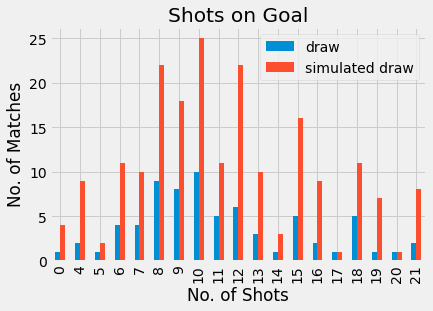

In [105]:
# Create a dictionary so we can combine the meta data for the series
draw_sim_shots_dict = { 'draw': draw_shots_distribution, 'simulated draw': draw_shots_sim_distribution }

# Create a dataframe and store it in 
draw_sim_shots_comparison = pd.DataFrame(draw_sim_shots_dict) 
draw_sim_shots_comparison.plot(kind="bar")

plt.title("Shots on Goal")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

<br>



##### 3.3.3 Possession


In [106]:
draw_possession.describe()

count    71.000000
mean     52.690141
std      12.418410
min      26.000000
25%      44.000000
50%      54.000000
75%      61.000000
max      76.000000
Name: home_team_possession, dtype: float64

In [107]:
# Assign values for mu and sigma based on real world data set
mu, sigma = 52.690141, 12.418410

# generate random values for simulated possession variable
draw_sim_possession_norm = np.random.default_rng().normal(mu, sigma, 200)

In [108]:
# Convert array to pandas series
draw_sim_possession_norm = pd.Series(draw_sim_possession_norm)

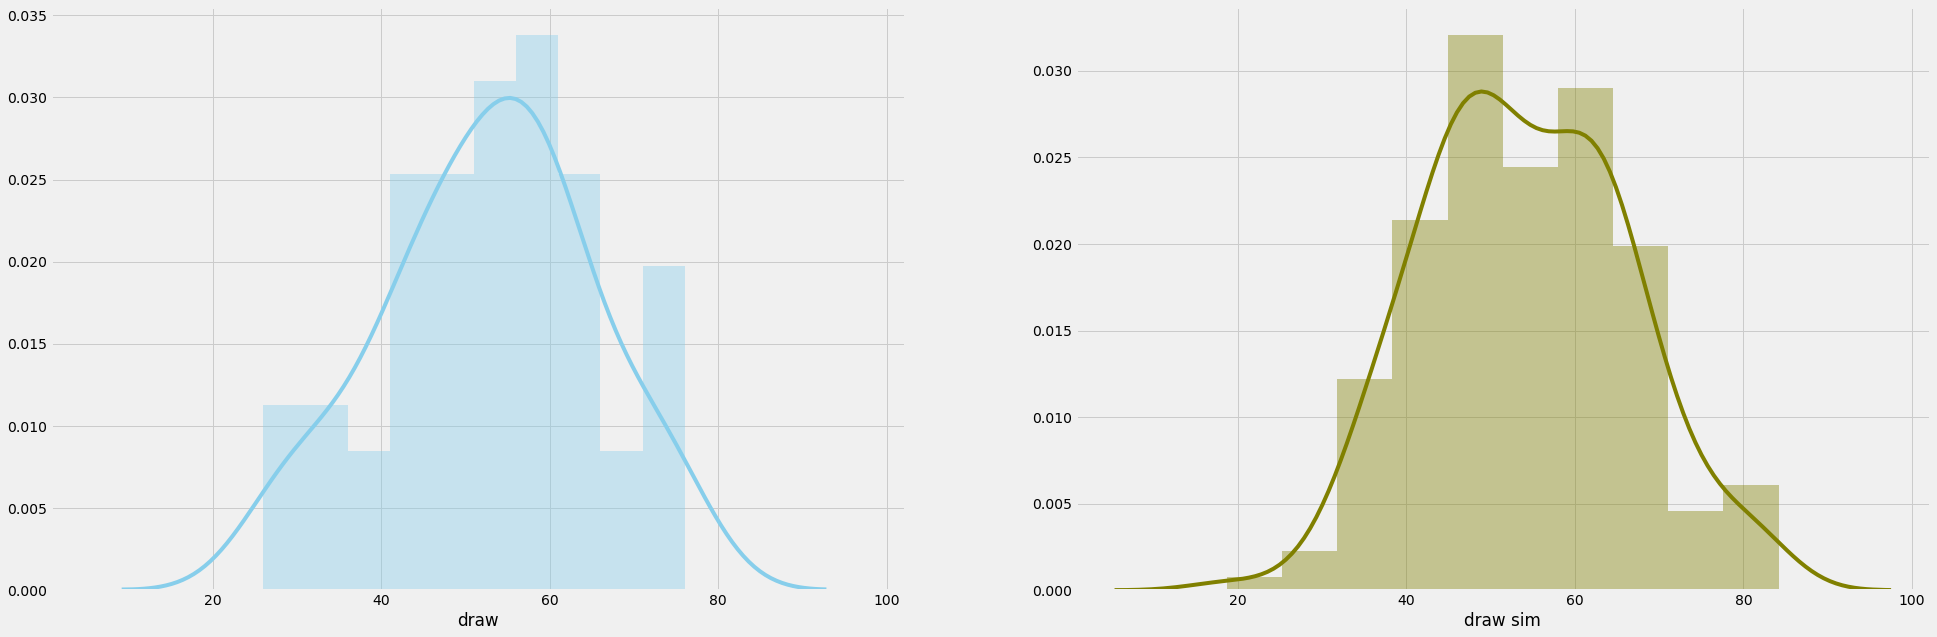

In [109]:
# Create a dictionary so we can combine the meta data for the series
draw_sim_possession_dict = { 'draw': draw_possession, 'draw sim': draw_sim_possession_norm } 

# Create a dataframe and store it in 
draw_sim_possession_comparison = pd.DataFrame(draw_sim_possession_dict) 

# plot
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
sns.distplot( draw_sim_possession_comparison["draw"] , bins=10, color="skyblue", ax=axes[0])
sns.distplot( draw_sim_possession_comparison["draw sim"] , bins=10, color="olive", ax=axes[1])

In [110]:
# sim_df["goals scored"] = 0
# sim_df["possession"] = 0
# sim_df["shots"] = 0

for i in range(len(sim_df)):
    if sim_df["result"][i]=="D":
        sim_df["goals scored"][i]=rng.choice(draw_goal_count_sim, 1)
        sim_df["possession"][i]=rng.choice(draw_sim_possession_norm, 1)
        sim_df["shots"][i]=rng.choice(draw_shots_sim, 1)

<ipython-input-110-ae317c0f36f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["goals scored"][i]=rng.choice(draw_goal_count_sim, 1)
<ipython-input-110-ae317c0f36f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["possession"][i]=rng.choice(draw_sim_possession_norm, 1)
<ipython-input-110-ae317c0f36f7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_df["shots"][i]=rng.choice(draw_shots_sim, 1)


In [111]:
sim_df.head(30)

,result,goals scored,possession,shots
0,W,2,43,14
1,W,4,48,9
2,L,1,65,6
3,L,1,43,15
4,W,3,68,16
5,D,0,79,10
6,W,2,47,8
7,W,4,51,16
8,W,3,49,13
9,D,1,42,16


In [112]:
sim_possession_uni = np.random.default_rng().uniform(30,80,200)

(array([20., 25., 16., 22., 19., 20., 27., 19., 19., 13.]),
 array([30.21538263, 35.19084383, 40.16630503, 45.14176624, 50.11722744,
        55.09268864, 60.06814985, 65.04361105, 70.01907225, 74.99453346,
        79.96999466]),
 <a list of 10 Patch objects>)

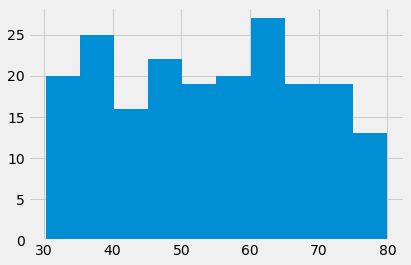

In [113]:
plt.hist(sim_possession_uni)

In [114]:
sim_possession_norm

0      75.931440
1      40.788554
2      52.137623
3      42.950654
4      68.335913
         ...    
195    68.284076
196    50.894819
197    35.843226
198    72.875795
199    65.353839
Length: 200, dtype: float64

### References
[1] footystats.org; https://footystats.org/download-stats-csv <br>
[2] How to get column names in Pandas dataframe; https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ <br>
[3] note.nkmk.me; https://note.nkmk.me/en/python-numpy-where/ <br>
[4] stackoverflow.com; https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions <br>
[5] stackoverflow.com; https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values <br>
[6] pydata.org; pandas.Series.value_counts; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html <br>
[7] pydata.org; pandas.Series.sort_index; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html <br>
[8] numpy.org; Random Generator; https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng <br>
[9] geeksforgeeks.org; Creating a dataframe from Pandas series; https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/ <br>
[10] Lynn, S.; Bar Plots in Python using Pandas DataFrames; https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/ <br>
[11] The Python Graph Gallery; Histogram with several variables | Seaborn; https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/ <br>
[12] w3resource.com; Python: Get unique values from a list; https://www.w3resource.com/python-exercises/list/python-data-type-list-exercise-29.php[11] <br>
[13] stackoverflow.com; https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1 <br>
[14] Romani, E; How to generate pseudo-random datasets in Python: start from scratch with Numpy & Faker; https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b <br>


**I will need to also have data for away team for comparison e.g. shots on goal, goals scored.**
* e.g. difference between winning team shots scored and losing team shots scored. Shots scored as a stand alone may not be enough info
* random.choice is well and good, but what about 7 goals? Distributions might be better. Work on binomial for goals scored.
* add labels to all plots
* More commentry on the investigations, especially the visualisation
* fill missing values for lose shots
* use subplots in Section 3 to view simulated and real pots side by side
* can you set a maximum and minimum value in random.normal?
* If possession = 25, they shoudn't really have 25 shots on goal. Sort out these anomalies
* 200 samples of each... sort that out maybe. Make it proportional to original data set